<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1MleNI0rcICpvrGd7SdYuQz7dn8NlAlEc" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Linear regression (Live coding) </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>


__Goal:__ Be comfortable running code, understanding regression models and documenting your results using the Google Colab platform

       
__Topics Trained:__ Train-test split, cross validation, Linear Regression (simple and multiple), Polynomial Regression, Multi-collinearity, Feature Scaling and Selection, Interpretability 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

: 

In [ ]:
sklearn.__version__

'1.0.2'

## Getting Data

<span style="color:orange"> We will use a standard house prices dataset in this session.</span>

In [3]:
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<span style="color:orange">We put our data into a pandas dataframe to get a nice idea of what we are working with</span>

In [5]:
df_simple = df[['RM', 'PRICE']]
df_simple.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## Data visualization

<span style="color:orange">We visualize our data to have a better idea of her</span>

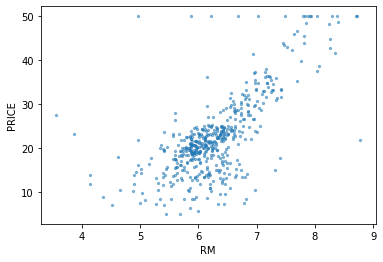

In [6]:
size = 5
df_simple.plot.scatter(x='RM', y='PRICE', s=size, alpha=.5);

## Train and test split

<span style="color:orange">Before running our regression model, we first split our data into train and test data. </span> <br>
<span style="color:orange">Do you remember why we do this?</span>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_simple[['RM']].values, # X
                                                    df_simple['PRICE'].values, # y
                                                    test_size=0.2, # %age of test split
                                                    random_state=17) # ensure reproducibility

In [ ]:
X_train[:5]

array([[5.957],
       [8.034],
       [7.236],
       [6.185],
       [8.337]])

In [ ]:
y_train[:5]

array([ 8.8, 50. , 36.1, 14.6, 41.7])

<span style="color:orange">Using the matplotlib.scatter() function, we can visualize our train and test data.<span>

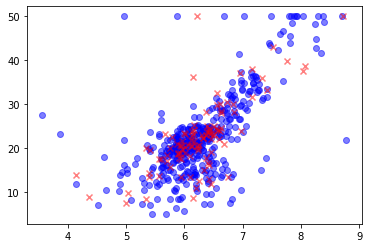

In [ ]:
plt.scatter(X_train, y_train, color = 'blue', marker='o', alpha=.5)
plt.scatter(X_test, y_test, color = 'red', marker='x', alpha=.5);

## Simple Linear Regression

<span style="color:orange"> Using the sklearn library, we import a simple linear regression model, train the model and then predict the labels. <span>

In [ ]:
from sklearn.linear_model import LinearRegression

# instantiating the model
regr = LinearRegression()

# train the model on the training data
regr.fit(X_train, y_train)

# predict on the unseen test data
pred = regr.predict(X_test)

In [ ]:
pred[:5]

array([26.63654061, 24.03094555, 23.32943918, 44.7299385 , 24.55024246])

In [ ]:
y_test[:5]

array([30.5, 22. , 17.7, 50. , 23.3])

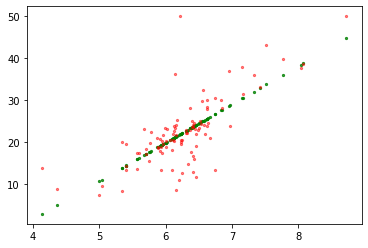

In [ ]:
plt.scatter(X_test, pred, color = 'green', s=size, alpha=.8)
plt.scatter(X_test, y_test, color = 'red', s=size, alpha=.5);

__Model evaluation__

<span style="color:orange">We use metrics from the sklearn library to evaluate our model.<span> <br>
<span style="color:orange">Do you know which metric we should use for regression models?<span>

In [ ]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 Score', metrics.r2_score(y_test, pred))

MAE 3.5768737579964998
MSE 30.168823173863736
RMSE 5.492615330956987
R2 Score 0.5425677190494489


__Cross-validation__

<span style="color:orange">We can also use cross validation to evaluate our model.<span>

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
scores

array([0.5276205 , 0.09903535, 0.25248342, 0.63458114, 0.56580636])

In [ ]:
np.mean(scores)

0.41590535299569575

## Helper Code snippets 

__Plot regression line and actual Train and Test data__

In [ ]:
def plot_regression(X_train, X_test, y_train, y_test, predictions, plot_title):
    
    zipped = sorted(zip(X_test, predictions))

    #extract variables from the list otherwise we cannot plot 
    X_test_sorted, y_pred_sorted = zip(*zipped)
    plt.scatter(X_train, y_train, color = 'blue', label='Train')
    plt.scatter(X_test, y_test, color = 'red', label='Test')
    plt.plot(X_test_sorted, y_pred_sorted, color = 'black', label='Preds')
    plt.title(plot_title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend();

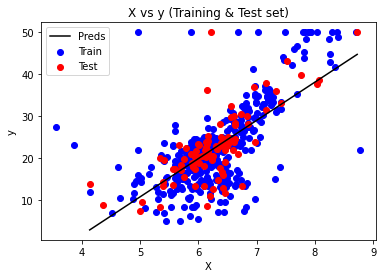

In [ ]:
plot_regression(
    X_train,
    X_test,
    y_train,
    y_test,
    pred,
    "X vs y (Training & Test set)",
)

## Linear Regression with Polynomial Features (Polynomial Regression)



### Feature Engg with polynomial degree of 3

In [ ]:
X_train[:5]

array([[5.957],
       [8.034],
       [7.236],
       [6.185],
       [8.337]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 3 Degrees

# initialize
poly_feat3 = PolynomialFeatures(degree=3, include_bias=False)

# fit and transform
X_poly3_train = poly_feat3.fit_transform(X_train)
X_poly3_test = poly_feat3.fit_transform(X_test)

X_poly3_train[:5]

array([[  5.957     ,  35.485849  , 211.38920249],
       [  8.034     ,  64.545156  , 518.5557833 ],
       [  7.236     ,  52.359696  , 378.87476026],
       [  6.185     ,  38.254225  , 236.60238162],
       [  8.337     ,  69.505569  , 579.46792875]])

In [ ]:
X_poly3_test[:5]

array([[  6.739     ,  45.414121  , 306.04576142],
       [  6.453     ,  41.641209  , 268.71072168],
       [  6.376     ,  40.653376  , 259.20592538],
       [  8.725     ,  76.125625  , 664.19607812],
       [  6.51      ,  42.3801    , 275.894451  ]])

### Train and Evaluate Model Performance

In [ ]:
regr2 = LinearRegression()
regr2.fit(X_poly3_train, y_train)

pred2 = regr2.predict(X_poly3_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred2))
print('MSE', metrics.mean_squared_error(y_test, pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 Score', metrics.r2_score(y_test, pred2))

MAE 3.749542287505079
MSE 30.431073865394538
RMSE 5.5164367000260714
R2 Score 0.5385913646747207


## Polynomial Regression with Scaling

### Apply standard scaling on our features

In [ ]:
X_poly3_train[:5]

array([[  5.957     ,  35.485849  , 211.38920249],
       [  8.034     ,  64.545156  , 518.5557833 ],
       [  7.236     ,  52.359696  , 378.87476026],
       [  6.185     ,  38.254225  , 236.60238162],
       [  8.337     ,  69.505569  , 579.46792875]])

In [ ]:
from sklearn.preprocessing import StandardScaler

# initialize object \ instance of StandardScaler class
ss = StandardScaler() 

# first do fit -> compute mean and standard dev. for each feature of train data 
# i.e., mean_X_poly3_train(Feature) and sigma_X_poly3_train(Feature) for each Feature
# then do transform -> scale each feature, X_train_scaled(Feature) = (X_poly3_train(Feature) - mean_X_poly3_train(Feature)) / sigma_X_poly3_train(Feature)
X_train_scaled = ss.fit_transform(X_poly3_train) 

# scale test data based on learned parameters from train data (don't FIT here again!)
# X_test_scaled(Feature) = (X_poly3_test(Feature) - mean_X_poly3_train(Feature)) / sigma_X_poly3_train(Feature)
X_test_scaled = ss.transform(X_poly3_test) 

___Transform and Fit-Transform will NOT give similar results here because we are scaling features based on learned parameters from the training data___

In [ ]:
ss.fit_transform(X_poly3_train) 
ss.transform(X_poly3_test)[:5]

array([[0.63135462, 0.58091041, 0.51785127],
       [0.22972475, 0.17126662, 0.11119819],
       [0.12159363, 0.06401269, 0.00767199],
       [3.42029491, 3.91541086, 4.41882287],
       [0.30976986, 0.25149168, 0.18944334]])

__Do NOT do the following when using standard scaling on test data__

In [ ]:
ss.fit_transform(X_poly3_test)[:5]

array([[0.71739652, 0.67383722, 0.61264214],
       [0.28389144, 0.22935833, 0.17079865],
       [0.16717853, 0.11298378, 0.05831364],
       [3.72768005, 4.29189544, 4.85119091],
       [0.3702893 , 0.31640554, 0.25581487]])

### Train and Evaluate Model Performance

In [ ]:
ss = StandardScaler() 

X_train_scaled = ss.fit_transform(X_poly3_train) 
X_test_scaled = ss.transform(X_poly3_test) 

In [ ]:
regr3 = LinearRegression()

regr3.fit(X_train_scaled, y_train)

pred3 = regr3.predict(X_test_scaled)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred3))
print('MSE', metrics.mean_squared_error(y_test, pred3))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('R2 Score', metrics.r2_score(y_test, pred3))

MAE 3.749542287504945
MSE 30.43107386539402
RMSE 5.516436700026025
R2 Score 0.5385913646747286


## Linear Regression with Pipelines

Do refer to [the documentation](https://scikit-learn.org/stable/modules/compose.html#pipeline) for more details

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps = [
                             ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),  # (step_name, actual_step_function\class)
                              ("modeling", LinearRegression())
                            ])


### Access specific steps in the pipeline

In [ ]:
pipeline[0]

PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
pipeline['poly_features']

PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
from sklearn import set_config
set_config(display='diagram')   

pipeline

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('modeling', LinearRegression())])

In [ ]:
set_config(display='text') 

### Train and Evaluate Pipeline

In [ ]:
X_train[:5]

array([[5.957],
       [8.034],
       [7.236],
       [6.185],
       [8.337]])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('modeling', LinearRegression())])

In [ ]:
X_test[:5]

array([[6.739],
       [6.453],
       [6.376],
       [8.725],
       [6.51 ]])

In [ ]:
pred4 = pipeline.predict(X_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred4))
print('MSE', metrics.mean_squared_error(y_test, pred4))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('R2 Score', metrics.r2_score(y_test, pred4))

MAE 3.749542287505079
MSE 30.431073865394538
RMSE 5.5164367000260714
R2 Score 0.5385913646747207


## Pipeline with more steps

In [ ]:
pipeline2 = Pipeline(steps = [("poly_features", PolynomialFeatures(degree=3, include_bias=False)), 
                              ("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

pipeline2

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
pipeline2.fit(X_train, y_train)

pred5 = pipeline2.predict(X_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred5))
print('MSE', metrics.mean_squared_error(y_test, pred5))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred5)))
print('R2 Score', metrics.r2_score(y_test, pred5))

MAE 3.749542287504945
MSE 30.43107386539402
RMSE 5.516436700026025
R2 Score 0.5385913646747286


## Multiple Linear Regression

We will now build a linear regression model with more than 1 feature (X) to predict the house price (y)

### Load the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['PRICE']),
                                                    df['PRICE'], 
                                                    test_size=0.2, 
                                                    random_state=17)

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0.0,0.6790,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
304,0.05515,33.0,2.18,0.0,0.4720,7.236,41.1,4.0220,7.0,222.0,18.4,393.68,6.93
478,10.23300,0.0,18.10,0.0,0.6140,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47


In [ ]:
y_train.head()

418     8.8
204    50.0
304    36.1
478    14.6
232    41.7
Name: PRICE, dtype: float64

### Train and Evaluate Model Performance for Multiple Regression

In [ ]:
pipeline3 = Pipeline(steps = [("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

pipeline3

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
scores = cross_val_score(pipeline3, X_train, y_train, cv=5, scoring='r2')
scores

array([0.73118832, 0.50454008, 0.69102965, 0.77909582, 0.79846954])

In [ ]:
pipeline3.fit(X_train, y_train)

pred6 = pipeline3.predict(X_test)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred6))
print('MSE', metrics.mean_squared_error(y_test, pred6))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred6)))
print('R2 Score', metrics.r2_score(y_test, pred6))

MAE 3.0093478774479934
MSE 19.813516840300505
RMSE 4.451237675107959
R2 Score 0.6995791930736399


## Effects of Multicollinearity on Linear Regression

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

For example, height and weight, fixed acidity and volatile acidity etc.

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable

Consider the basic linear regression model:

$$Y = W0 + W1*X1 + W2*X2$$

Coefficient W1 is the increase in Y for a unit increase in X1 __while keeping X2 constant.__ 

But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

_“ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”_

Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model which can be a problem in interpretability.

__Be very careful with handling multicollinearity and only drop features if you are absolutely sure it may not be important.__

We will now use correlations to remove highly correlated features from our data before training the model.

### Computing Feature Correlations

In [ ]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.191094,0.387283,-0.061758,0.403585,-0.200970,0.354149,-0.374757,0.611216,0.565849,0.284911,-0.369859,0.440920
ZN,-0.191094,1.000000,-0.534278,-0.029703,-0.510592,0.371164,-0.574982,0.644491,-0.298482,-0.329170,-0.396009,0.172950,-0.432818
INDUS,0.387283,-0.534278,1.000000,0.054777,0.757879,-0.399652,0.670818,-0.724577,0.576566,0.717634,0.363092,-0.342228,0.610225
CHAS,-0.061758,-0.029703,0.054777,1.000000,0.076716,0.139809,0.068686,-0.091363,-0.011715,-0.043413,-0.132850,0.041297,-0.114370
NOX,0.403585,-0.510592,0.757879,0.076716,1.000000,-0.324919,0.741742,-0.774301,0.596362,0.663097,0.183405,-0.374589,0.611067
RM,-0.200970,0.371164,-0.399652,0.139809,-0.324919,1.000000,-0.292016,0.257437,-0.206997,-0.291773,-0.371130,0.153252,-0.597194
AGE,0.354149,-0.574982,0.670818,0.068686,0.741742,-0.292016,1.000000,-0.747020,0.460340,0.531382,0.268139,-0.282854,0.627272
DIS,-0.374757,0.644491,-0.724577,-0.091363,-0.774301,0.257437,-0.747020,1.000000,-0.489385,-0.558018,-0.231657,0.294837,-0.520455
RAD,0.611216,-0.298482,0.576566,-0.011715,0.596362,-0.206997,0.460340,-0.489385,1.000000,0.905905,0.471209,-0.419047,0.480836
TAX,0.565849,-0.329170,0.717634,-0.043413,0.663097,-0.291773,0.531382,-0.558018,0.905905,1.000000,0.462861,-0.418417,0.543939


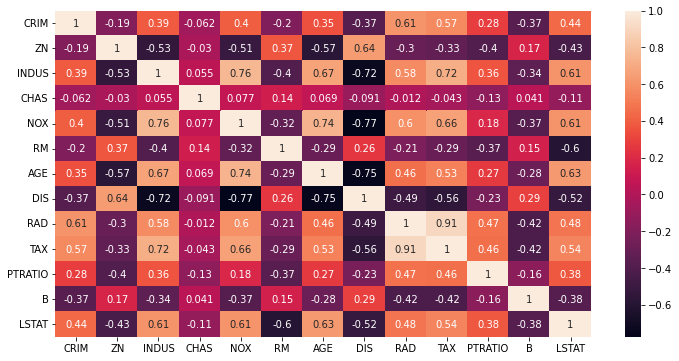

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True);

### Visualizing strong feature correlations > 0.75

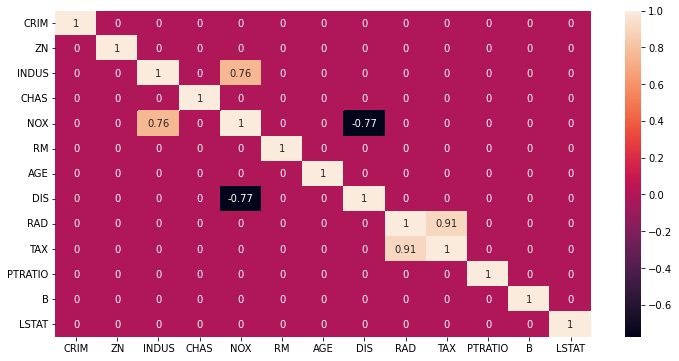

In [ ]:
r = X_train.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(12, 6))
sns.heatmap(r, annot=True);

### Feature Selection based on Strong Correlations

In [ ]:
features_to_drop = ['NOX', 'RAD']

X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

In [ ]:
X_train_reduced.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
418,73.53410,0.0,18.10,0.0,5.957,100.0,1.8026,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0.0,8.034,31.9,5.1180,224.0,14.7,390.55,2.88
304,0.05515,33.0,2.18,0.0,7.236,41.1,4.0220,222.0,18.4,393.68,6.93
478,10.23300,0.0,18.10,0.0,6.185,96.7,2.1705,666.0,20.2,379.70,18.03
232,0.57529,0.0,6.20,0.0,8.337,73.3,3.8384,307.0,17.4,385.91,2.47


### Train and Evaluate Model Performance for Multiple Regression

In [ ]:
pipeline4 = Pipeline(steps = [("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

pipeline4

Pipeline(steps=[('standard_scale', StandardScaler()),
                ('modeling', LinearRegression())])

In [ ]:
scores = cross_val_score(pipeline4, X_train_reduced, y_train, cv=5, scoring='r2')
scores

array([0.68916705, 0.44036822, 0.69388082, 0.78517171, 0.79104353])

In [ ]:
pipeline4.fit(X_train_reduced, y_train)

pred7 = pipeline4.predict(X_test_reduced)

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, pred7))
print('MSE', metrics.mean_squared_error(y_test, pred7))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred7)))
print('R2 Score', metrics.r2_score(y_test, pred7))

MAE 3.0783364380004654
MSE 21.420022783344802
RMSE 4.628177047536622
R2 Score 0.6752206798610989


### Basic Model Interpretation

In [ ]:
model = pipeline4['modeling']
model

LinearRegression()

In [ ]:
model.coef_

array([-0.56113897,  1.21989373, -0.42043713,  0.80046705,  2.85671057,
       -0.47918661, -2.39794141, -0.38470111, -1.52195597,  0.66083044,
       -4.16008103])

In [ ]:
pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Coef': model.coef_
}).sort_values(by=['Coef'], ascending=False)

,Feature,Coef
4,RM,2.856711
1,ZN,1.219894
3,CHAS,0.800467
9,B,0.660830
7,TAX,-0.384701
2,INDUS,-0.420437
5,AGE,-0.479187
0,CRIM,-0.561139
8,PTRATIO,-1.521956
6,DIS,-2.397941


Most important features affecting model predictions:

- RM:       average number of rooms per dwelling
- LSTAT:    % lower status of the population
- DIS:      weighted distances to five Boston employment centres
- PTRATIO:  pupil-teacher ratio in schools

        

## Exercise 1

## Data preparation

In [ ]:
orig_url = "https://drive.google.com/file/d/18OoFep3-A1OXAShWVxAdZ-xDIhBUmCVw/view?usp=sharing"
file_id = orig_url.split('/')[-2]
data_path='https://drive.google.com/uc?export=download&id=' + file_id

In [ ]:
# data_path = "data/density_vs_alcohol.csv"

In [ ]:
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(4898, 2)


,density,alcohol
0,1.0010,8.8
1,0.9940,9.5
2,0.9951,10.1
3,0.9956,9.9
4,0.9956,9.9
